Exploratory analaysis of the filtered callsets.  We create a matrix whose rows are somatic SNVs.  Columns include: annotations from VCF files, clinical variables and variables specific to genomic regions. This latter class of variables contains information on chromatin state (from RoadMap Epigen Consortium), evolutionarily constrain, GWAS and CNV loci associated to schizophrenia...

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from bsm import readVCF
from bsm import individuals
from bsm import preprocessing
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas.plotting as ppl
import re
%matplotlib inline

In [2]:
plt.style.use('classic')

### Annotation of callsets

In [3]:
%%bash
~/projects/bsm/src/bsm/readVCF.py -h
if false; then
# run script with default options
~/projects/bsm/src/bsm/readVCF.py
fi

usage: readVCF.py [-h] [-d DIR] [-l VCFLIST]

optional arguments:
  -h, --help            show this help message and exit
  -d DIR, --dir DIR     main VCF directory
                        (/home/attila/projects/bsm/results/calls/)
  -l VCFLIST, --vcflist VCFLIST
                        list of samples and VCF files
                        (/big/results/bsm/calls/filtered-vcfs.tsv)


### Loading callsets

In [4]:
calls = individuals.get_data(merge=True, cleancalls=False)
calls

REF ALT     QUAL   FILTER/PASS  \
Individual ID Tissue  CHROM POS       Mutation                                  
CMC_MSSM_027  NeuN_pl 1     11973569  C->T       C   T    83.07  HC;PASS/PASS   
                            67324428  A->T       A   T   203.16  HC;PASS/PASS   
                            182008461 C->T       C   T   164.46  HC;PASS/PASS   
                            207598957 C->T       C   T   168.14  HC;PASS/PASS   
                            219342012 C->T       C   T    78.80  HC;PASS/PASS   
...                                             ..  ..      ...           ...   
CMC_PITT_118  NeuN_pl 19    29600767  C->T       C   T    79.79  HC;PASS/PASS   
                            58291104  C->T       C   T    77.85  HC;PASS/PASS   
                      X     5889841   G->A       G   A  1084.39  HC;PASS/PASS   
                            71258041  C->T       C   T    99.85  HC;PASS/PASS   
                            120533592 C->A       C   A    91.24  HC;PASS/PASS   

                                                 FILTER/HC   FILTER/EXT  AC  \
Individual ID Tissue  CHROM POS       Mutation                                
CMC_MSSM_027  NeuN_pl 1     11973569  C->T      HC;PASS/HC  HC;PASS/EXT   1   
                            67324428  A->T      HC;PASS/HC  HC;PASS/EXT   3   
                            182008461 C->T      HC;PASS/HC  HC;PASS/EXT   3   
                            207598957 C->T      HC;PASS/HC  HC;PASS/EXT   3   
                            219342012 C->T      HC;PASS/HC  HC;PASS/EXT   1   
...                                                    ...          ...  ..   
CMC_PITT_118  NeuN_pl 19    29600767  C->T      HC;PASS/HC  HC;PASS/EXT   1   
                            58291104  C->T      HC;PASS/HC  HC;PASS/EXT   2   
                      X     5889841   G->A      HC;PASS/HC  HC;PASS/EXT  10   
                            71258041  C->T      HC;PASS/HC  HC;PASS/EXT   2   
                            120533592 C->A      HC;PASS/HC  HC;PASS/EXT   1   

                                                  AF  AN  BaseQRankSum  ...  \
Individual ID Tissue  CHROM POS       Mutation                          ...   
CMC_MSSM_027  NeuN_pl 1     11973569  C->T      0.02  50         0.517  ...   
                            67324428  A->T      0.06  50        -2.660  ...   
                            182008461 C->T      0.06  50         1.420  ...   
                            207598957 C->T      0.06  50         1.040  ...   
                            219342012 C->T      0.02  50         1.600  ...   
...                                              ...  ..           ...  ...   
CMC_PITT_118  NeuN_pl 19    29600767  C->T      0.02  50         3.680  ...   
                            58291104  C->T      0.04  50        -1.118  ...   
                      X     5889841   G->A      0.20  50         5.230  ...   
                            71258041  C->T      0.04  50         1.820  ...   
                            120533592 C->A      0.02  50         2.430  ...   

                                                Illicitsub  causeOfDeath  \
Individual ID Tissue  CHROM POS       Mutation                             
CMC_MSSM_027  NeuN_pl 1     11973569  C->T               0             1   
                            67324428  A->T               0             1   
                            182008461 C->T               0             1   
                            207598957 C->T               0             1   
                            219342012 C->T               0             1   
...                                                    ...           ...   
CMC_PITT_118  NeuN_pl 19    29600767  C->T               0             1   
                            58291104  C->T               0             1   
                      X     5889841   G->A               0             1   
                            71258041  C->T               0             1   
                         

In [5]:
repr(list(calls.columns))

"['REF', 'ALT', 'QUAL', 'FILTER/PASS', 'FILTER/HC', 'FILTER/EXT', 'AC', 'AF', 'AN', 'BaseQRankSum', 'DP', 'DS', 'END', 'ExcessHet', 'FS', 'InbreedingCoeff', 'MLEAC', 'MLEAF', 'MQ', 'MQRankSum', 'NEGATIVE_TRAIN_SITE', 'POSITIVE_TRAIN_SITE', 'QD', 'RAW_MQandDP', 'ReadPosRankSum', 'SOR', 'VQSLOD', 'culprit', 'ChromatinState_DLPFC', 'SiPhyLOD', 'SiPhyBranchLen', 'szdbCNVcount', 'GWASpval', 'evolConstrain', 'Institution', 'Reported Gender', 'Sex', 'Ethnicity', 'ageOfDeath', 'Brain Weight (in grams)', 'PMI (in hours)', 'Dx', 'Year of Autopsy', 'Benzodiazepines', 'Anticonvulsants', 'AntipsychTyp', 'AntipsychAtyp', 'Antidepress', 'Lithium', 'Tobacco', 'Alcohol', 'Illicitsub', 'causeOfDeath', 'Hyperten', 'DiabetesInsDep', 'DiabetesNonInsDep', 'EV.1', 'EV.2', 'EV.3', 'EV.4', 'EV.5']"

KeyError: 'Individual ID'

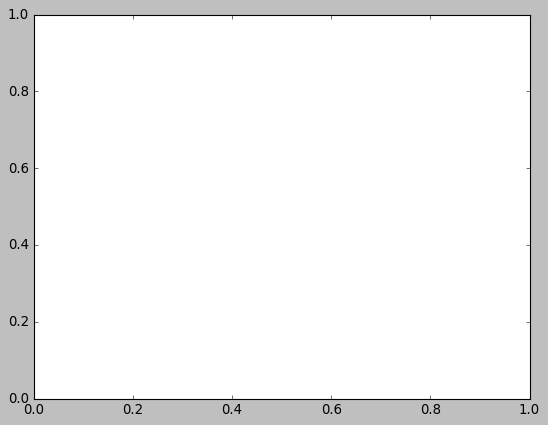

In [7]:
def foo(Dx, ax, xmin=0, xmax=70):
    x = calls.loc[calls['Dx'] == Dx, 'Individual ID'].value_counts()
    x = x.sort_values()
    ax.step(list(x) + [70], range(len(x) + 1), label=Dx, linewidth=2)
    #df = calls.loc[calls['Dx'] == Dx, :]
    #return(df.groupby('Sample').count()['Dx'])

fig, ax = plt.subplots(figsize=(8, 6))
xmin, xmax = 0, 70
foo('Control', ax)
foo('SCZ', ax)
#ax.set_ylim(0, 11)
ax.legend(loc='upper left')
ax.set_title('Empirical CDF')
ax.set_xlabel('# variants')
ax.set_ylabel('# samples')

In [ ]:
s = calls.groupby(['Dx', 'Individual ID']).size()
s = s[s != 0]
fig, ax = plt.subplots(figsize=(8, 6))
def foo(Dx):
    y = s.groupby('Dx').get_group(Dx).sort_values().values
    x = range(len(y))
    ax.step(y, x, label=Dx, linewidth=2)

foo('Control')
foo('SCZ')
ax.legend(loc='lower right')
ax.set_title('Empirical CDF')
ax.set_xlabel('# variants')
ax.set_ylabel('# samples')

### Evolutionary constrain

In [ ]:
evol_Dx = pd.crosstab(calls['evolConstrain'], calls['Dx'], margins=True)
evol_Dx

In [ ]:
evol_Dx_norm = pd.crosstab(calls['evolConstrain'], calls['Dx'], margins=True, normalize='index')

def simplebar(df, df_norm):
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
    df[['Control', 'SCZ']].plot.barh(stacked=True, ax=ax[0], legend=False, title='Count')
    ax[1].vlines(df_norm.loc['All', 'Control'], *ax[1].get_ylim(), colors='red', linestyles='dashed')
    df_norm.plot.barh(stacked=True, ax=ax[1], title='Normalized Count')
    return((fig, ax))

simplebar(evol_Dx, evol_Dx_norm)

### Chromatin state in DLPFC

In [ ]:
state_Dx = pd.crosstab(calls['ChromatinState_DLPFC'], calls['Dx'], margins=True)
state_Dx

In [ ]:
state_Dx_norm = pd.crosstab(calls['ChromatinState_DLPFC'], calls['Dx'], normalize='index', margins=True)
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
state_Dx[['Control', 'SCZ']].plot.barh(stacked=True, ax=ax[0], legend=False, title='Count')
ax[0].grid(True, axis='y')
ax[1].vlines(state_Dx_norm.loc['All', 'Control'], *ax[1].get_ylim(), colors='red', linestyles='dashed')
state_Dx_norm.plot.barh(stacked=True, ax=ax[1], title='Normalized Count')

### Allele frequency

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
calls.hist(column='AF', by='Dx', ax=ax[0:2], grid=True, color='gray')
calls.boxplot('AF', by='Dx', vert=False, ax=ax[2], showfliers=True, color='black')
ax[2].set_xlabel('Allele frequency')
ax[2].set_title('')
fig.suptitle('Allele frequency (AF) distribution')
ax[2].set_ylim(2.5, 0.5)

### Schizophrenia CNVs

The `szdbCNVcount` variable shows the number of occurrence in [SZDB](http://www.szdb.org/) of a CNV---more precisely a single cytogenic band containing or contained in that CNV.  This information was taken from [this table](http://www.szdb.org/download/CNV.txt) in SZDB.  See the `2020-07-24-szdb` article in this notebook.

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
calls.hist(column='szdbCNVcount', by='Dx', ax=ax, grid=True, color='gray', bins=range(50))
ax[1].set_xlabel('# studies implicating some CNV in schizophrenia around variant')    
ax[0].set_ylabel('# somatic variants')
ax[1].set_ylabel('# somatic variants')

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8, 2))
def foo(ax):
    calls.boxplot('szdbCNVcount', by='Dx', vert=False, ax=ax, grid=False)
    ax.set_xlabel('')
    ax.set_title('')
    
foo(ax[0])
foo(ax[1])
ax[0].set_xlim([0, 10.5])
ax[1].set_xlim([10.5, 50])
fig.suptitle('# studies implicating some CNV in schizophrenia around variant')

In [ ]:
gb = calls.groupby(['Dx', 'Individual ID', 'szdbCNVcount'])
s = gb.size()
s

In [ ]:
def boo(xlim=None):
    fig, ax = plt.subplots(2, 1, sharey=True, sharex=True, figsize=(8, 8))
    multiix = calls.groupby(['Dx', 'Individual ID']).size().index
    mycolors = {'Control': 'blue', 'SCZ': 'green'}
    for ix in multiix:
        a = s.loc[ix]
        if a.any():
            Dx = ix[0]
            row = 0 if Dx == 'Control' else 1
            a.plot(marker='o', ax=ax[row], label=ix[1])
            ax[0].set_ylabel('# somatic variants')
            ax[1].set_ylabel('# somatic variants')
            fig.suptitle('Distribution of szdbCNVcount for each sample')
            if xlim is not None:
                ax[0].set_xlim(xlim)
    #ax[0].legend()
    #ax[1].legend()

boo()

In [ ]:
boo([0, 10])

### GWAS

The `GWASpval` variable is $-\log_{10}$ of the p-value from the CLOZUK + PG2 GWAS meta analysis.  See the *2020-07-28-CLOZUK* notebook article.  Note that if a somatic variant is not in the LD block of any of the GWAS loci then I set $\mathrm{GWASpval}=0$.

Below is the number of variants that fall in some GWAS loci

In [ ]:
gwas = calls.groupby([calls['GWASpval'] !=0, 'Dx']).size()
gwas

In [ ]:
gwas = pd.crosstab(calls['GWASpval'] !=0, calls['Dx'], margins=True)
gwas_norm = pd.crosstab(calls['GWASpval'] !=0, calls['Dx'], margins=True, normalize='index')
fig, ax = simplebar(gwas, gwas_norm)
ax[0].set_ylabel('variants in SCZ GWAS loci')

### Multidimensional view

In [ ]:
sel_cols = ['Dx', 'QUAL', 'AF', 'BaseQRankSum', 'DP', 'FS', 'QD', 'ReadPosRankSum', 'SOR', 'VQSLOD', 'szdbCNVcount']
calls1 = preprocessing.preprocess(calls.loc[:, sel_cols], prettify=False, dummify=False)

In [ ]:
ax = ppl.scatter_matrix(calls1[sel_cols], diagonal='hist', figsize=(12, 12), color='C2', hist_kwds={'color': 'C2'})

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ppl.parallel_coordinates(calls1, class_column='Dx', ax=ax, color=['C0', 'C1'])
#ppl.ordinates(df, class_column='Dx', ax=ax, color=['blue', 'orange'])
_ = plt.xticks(rotation=90)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ppl.radviz(calls1, class_column='Dx', ax=ax, color=['C0', 'C1'])

In [ ]:
%connect_info